In [1]:
import os
import sys
import json
from tqdm import tqdm_notebook as tqdm
from pprint import pprint

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
BASE_DIR = '../mnt/inputs/origin'
TRN_BASE_DIR = '../mnt/inputs/features/train'
TST_BASE_DIR = '../mnt/inputs/features/test'
# BASE_DIR = '../mnt/inputs/features/test'

In [3]:
trn_df = pd.read_pickle(f'{BASE_DIR}/train.pkl.gz')
trn_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [4]:
tst_df = pd.read_csv(f'{BASE_DIR}/test.csv')
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [5]:
label_df = pd.read_csv('../mnt/inputs/origin/train_labels.csv')
label_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [299]:
specs_df = pd.read_csv('../mnt/inputs/origin/specs.csv')
specs_df.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [16]:
sub_df = pd.read_csv('../mnt/inputs/origin/sample_submission.csv')
sub_df.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


## 系列長見てみる

In [69]:
# trn_cnt_df = trn_df[
#     trn_df.installation_id.isin(label_df.installation_id.unique())
# ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()
# 
# 
# 
# tst_cnt_df = tst_df.groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()

In [128]:
a = pd.read_pickle('../mnt/inputs/features/test/KernelBasics3.pkl')
a.head()

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,installation_id,prev_acc_gr_0,prev_acc_gr_1,prev_acc_gr_2,prev_acc_gr_3,prev_cumnum_c,prev_cumnum_inc,prev_num_corrects,prev_num_incorrects,type
1,0.0,0.0,1960630.0,0.0,0.0,0.0,0.0,33762.0,30038.0,0.0,...,00abaee7,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,Assessment
5,0.0,123930.0,64279.0,0.0,82149.0,349158.0,96816.0,74207.0,15839.0,36926.0,...,01242218,0.0,1.0,0.0,0.0,4.0,7.0,1.0,2.0,Assessment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,017c5718,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Assessment
0,0.0,0.0,77204.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,01a44906,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Assessment
0,0.0,0.0,610645.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,01bc6cb6,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Assessment


In [193]:
trn_cnt_df = trn_df[
    (trn_df.type == 'Assessment')
            & (
                ((trn_df.event_code == 4100)
                 & (trn_df.title != 'Bird Measurer (Assessment)'))
                | ((trn_df.event_code == 4110)
                   & (trn_df.title == 'Bird Measurer (Assessment)'))
            )
    ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()

trn_cnt_df = trn_cnt_df.rename(columns={'timestamp': 'session_len'}).reset_index()

In [201]:
tst_cnt_df = tst_df[
    ((tst_df.type == 'Assessment')
            & (
                ((tst_df.event_code == 4100)
                 & (tst_df.title != 'Bird Measurer (Assessment)'))
                | ((tst_df.event_code == 4110)
                   & (tst_df.title == 'Bird Measurer (Assessment)'))
            ))
    | (tst_df.game_session.isin(a.game_session.unique()))
    ].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values().rolling(10000, min_periods=1).count()).reset_index()

tst_cnt_df = tst_cnt_df.rename(columns={'timestamp': 'session_len'}).reset_index()

In [203]:
tst_cnt_df = tst_cnt_df.sort_values(['installation_id', 'session_len']).drop_duplicates('installation_id', keep='last')

In [204]:
max_len = int(max(trn_cnt_df.session_len.max(), tst_cnt_df.session_len.max()))

/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


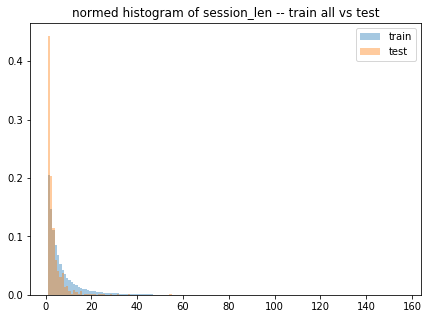

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

bins = np.linspace(1, max_len, max_len)
ax.hist(trn_cnt_df.session_len, bins=bins, alpha=0.4, label='train', normed=True)
ax.hist(tst_cnt_df.session_len, bins=bins, alpha=0.4, label='test', normed=True)

ax.set_title('normed histogram of session_len -- train all vs test')
ax.legend()

In [206]:
dropped_session_len = trn_cnt_df[trn_cnt_df.game_session.isin(label_df.game_session)].sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').session_len

In [170]:
pd.DataFrame([[1, 2], [1, 3], [2, 3]], index=[3, 2, 1]).drop_duplicates(0, keep='last')

,0,1
2,1,3
1,2,3


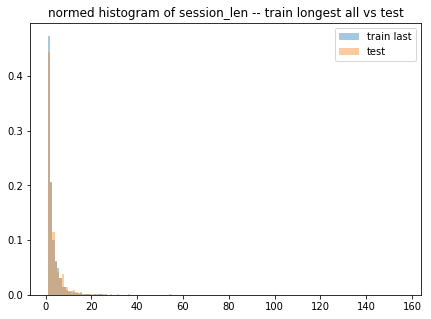

In [207]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

bins = np.linspace(1, max_len, max_len)
ax.hist(dropped_session_len, bins=bins, alpha=0.4, label='train last', normed=True)
ax.hist(tst_cnt_df.session_len, bins=bins, alpha=0.4, label='test', normed=True)

ax.set_title('normed histogram of session_len -- train longest all vs test')
ax.legend()

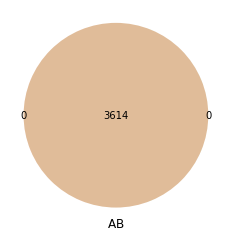

In [208]:
import matplotlib_venn
matplotlib_venn.venn2(
    [
        set(trn_cnt_df.sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').game_session),
        set(trn_cnt_df[trn_cnt_df.game_session.isin(label_df.game_session)].sort_values(['installation_id', 'game_session', 'session_len']).drop_duplicates('installation_id', keep='last').game_session)
     ]
)

In [209]:
dropped_session_len.value_counts().sort_index()

1.0      1709
2.0       742
3.0       359
4.0       221
5.0       178
6.0       110
7.0        54
8.0        52
9.0        31
10.0       28
11.0       22
12.0       19
13.0        9
14.0       14
15.0       10
16.0        8
17.0        6
18.0        5
19.0        8
20.0        1
21.0        4
22.0        3
23.0        4
24.0        3
25.0        1
26.0        2
29.0        1
30.0        1
31.0        1
32.0        1
34.0        1
37.0        1
43.0        1
46.0        1
47.0        1
125.0       1
139.0       1
Name: session_len, dtype: int64

In [210]:
tst_cnt_df.session_len.value_counts().sort_index()

1.0     443
2.0     204
3.0     114
4.0      60
5.0      41
6.0      30
7.0      38
8.0      14
9.0      15
10.0      6
11.0      1
12.0      8
13.0      5
14.0      2
15.0      6
17.0      1
18.0      1
19.0      1
20.0      1
21.0      2
23.0      1
24.0      1
25.0      1
28.0      1
31.0      1
36.0      1
54.0      1
Name: session_len, dtype: int64

In [120]:
df1 = pd.read_pickle('../mnt/inputs/features/train/befTargetCntFeatures.pkl')
df2 = pd.read_pickle('../mnt/inputs/features/test/befTargetCntFeatures.pkl')

In [121]:
df1.head()

,installation_id,game_session,f019_bef_target_cnt
0,0006a69f,901acc108f55a5a1,1.0
1,0006a69f,77b8ee947eb84b4e,2.0
2,0006a69f,6bdf9623adc94d89,3.0
3,0006a69f,9501794defd84e4d,4.0
4,0006a69f,a9ef3ecb3d1acc6a,5.0


In [122]:
df2.head()

,installation_id,game_session,f019_bef_target_cnt
0,00abaee7,348d7f09f96af313,2.0
0,01242218,1fef5d54cb4b775a,6.0
0,017c5718,4b165a330a0bdd6c,1.0
0,01a44906,be0b655ad1fee30c,1.0
0,01bc6cb6,46e8bbed71df7520,1.0


In [227]:
label_df[label_df.game_session.isin(df1.sort_values(['installation_id', 'f019_bef_target_cnt']).drop_duplicates('installation_id', keep='last').game_session.tolist())].accuracy_group.value_counts()

3    1629
0    1023
1     496
2     466
Name: accuracy_group, dtype: int64

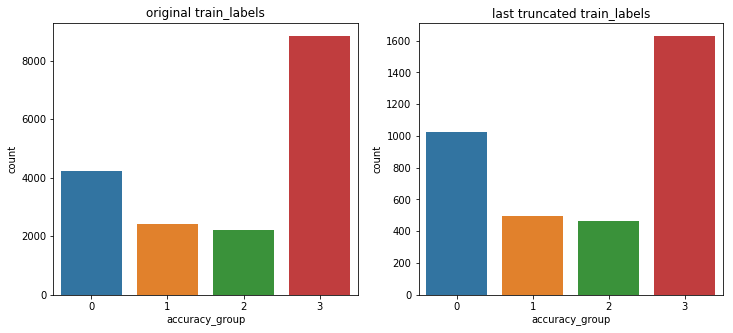

In [234]:
fig, axs = plt.subplots(1,2,figsize=(12, 5))

ax = axs[0]
ax.set_title('original train_labels')
sns.countplot(label_df.accuracy_group, ax=ax)


ax = axs[1]
ax.set_title('last truncated train_labels')
sns.countplot(label_df[label_df.game_session.isin(df1.sort_values(['installation_id', 'f019_bef_target_cnt']).drop_duplicates('installation_id', keep='last').game_session.tolist())].accuracy_group, ax=ax)

plt.show()

In [164]:
df1\
    .sort_values(['installation_id', 'game_session', 'f019_bef_target_cnt'])\
    .drop_duplicates('installation_id', keep='last')\
    .f019_bef_target_cnt\
    .value_counts().sort_index()

1.0      1709
2.0       742
3.0       359
4.0       221
5.0       178
6.0       110
7.0        54
8.0        52
9.0        31
10.0       28
11.0       22
12.0       19
13.0        9
14.0       14
15.0       10
16.0        8
17.0        6
18.0        5
19.0        8
20.0        1
21.0        4
22.0        3
23.0        4
24.0        3
25.0        1
26.0        2
29.0        1
30.0        1
31.0        1
32.0        1
34.0        1
37.0        1
43.0        1
46.0        1
47.0        1
125.0       1
139.0       1
Name: f019_bef_target_cnt, dtype: int64

In [172]:
df2.f019_bef_target_cnt.value_counts().sort_index()

1.0     443
2.0     204
3.0     114
4.0      60
5.0      41
6.0      30
7.0      38
8.0      14
9.0      15
10.0      6
11.0      1
12.0      8
13.0      5
14.0      2
15.0      6
17.0      1
18.0      1
19.0      1
20.0      1
21.0      2
23.0      1
24.0      1
25.0      1
28.0      1
31.0      1
36.0      1
54.0      1
Name: f019_bef_target_cnt, dtype: int64

In [173]:
df2.head()

,installation_id,game_session,f019_bef_target_cnt
0,00abaee7,348d7f09f96af313,2.0
0,01242218,1fef5d54cb4b775a,6.0
0,017c5718,4b165a330a0bdd6c,1.0
0,01a44906,be0b655ad1fee30c,1.0
0,01bc6cb6,46e8bbed71df7520,1.0


In [195]:
tst_cnt_df.head()

,index,installation_id,game_session,session_len
0,0,00abaee7,8b38fc0d2fd315dc,1.0
1,1,00abaee7,348d7f09f96af313,2.0
2,2,01242218,009c890ce6c4f3e3,1.0
3,3,01242218,e8e62de939f916bc,2.0
4,4,01242218,ab61cae5e3215355,3.0


In [180]:
a[['game_session']].head()

,game_session
1,348d7f09f96af313
5,1fef5d54cb4b775a
0,4b165a330a0bdd6c
0,be0b655ad1fee30c
0,46e8bbed71df7520


In [192]:
tst_df.query('installation_id == "00abaee7"').drop_duplicates('game_session').query('type == "Assessment"')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
282,7ad3efc6,8b38fc0d2fd315dc,2019-09-11T18:56:11.918Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cart Balancer (Assessment),Assessment,CRYSTALCAVES
867,90d848e0,348d7f09f96af313,2019-09-12T13:52:12.193Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",00abaee7,1,2000,0,Cauldron Filler (Assessment),Assessment,MAGMAPEAK


In [ ]:
tst_df.query('')

In [184]:
dropped_session_len.head()

4     5.0
7     2.0
8     1.0
13    2.0
14    1.0
Name: session_len, dtype: float64

In [186]:
trn_cnt_df.head(6)

,index,installation_id,game_session,session_len
0,0,0006a69f,901acc108f55a5a1,1.0
1,1,0006a69f,77b8ee947eb84b4e,2.0
2,2,0006a69f,6bdf9623adc94d89,3.0
3,3,0006a69f,9501794defd84e4d,4.0
4,4,0006a69f,a9ef3ecb3d1acc6a,5.0
5,5,0006c192,197a373a77101924,1.0


In [189]:
trn_df.query('installation_id == "0006a69f"').drop_duplicates('game_session').query('type == "Assessment"')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2185,3bfd1a65,901acc108f55a5a1,2019-08-06T05:22:01.344Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
2681,f56e0afc,77b8ee947eb84b4e,2019-08-06T05:35:19.167Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY
2768,3bfd1a65,6bdf9623adc94d89,2019-08-06T05:37:50.020Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3680,3bfd1a65,e7e7db2a241eadcc,2019-08-06T20:34:35.357Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
3697,3bfd1a65,9501794defd84e4d,2019-08-06T20:34:53.812Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Mushroom Sorter (Assessment),Assessment,TREETOPCITY
4124,f56e0afc,a9ef3ecb3d1acc6a,2019-08-06T20:49:59.095Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Bird Measurer (Assessment),Assessment,TREETOPCITY


In [ ]:
trn_cnt_df_2 = trn_df[trn_df.installation_id.isin(label_df.installation_id.unique())].groupby(['installation_id']).apply(lambda x: x.groupby('game_session').timestamp.max().sort_values()).reset_index()

In [53]:
trn_cnt_df_2 = trn_cnt_df_2.merge(trn_cnt_df, on=['installation_id', 'game_session'], how='left')
trn_cnt_df_2 = trn_cnt_df_2.sort_values(['installation_id', 'game_session', 'timestamp_max']).drop_duplicates('installation_id', keep='last')
trn_cnt_df_2.head()

,installation_id,game_session,timestamp_max,timestamp
58,0006a69f,fbe9d0c5478ecfc6,2019-08-06T20:53:52.621Z,59.0
101,0006c192,fa6560f04b64714c,2019-09-14T15:31:47.288Z,22.0
132,00129856,ff48f8654fa01dae,2019-09-22T16:36:13.558Z,3.0
144,001d0ed0,f254185e012e45a8,2019-09-05T13:57:19.109Z,6.0
191,00225f67,fe34349639799cd6,2019-10-05T23:48:27.823Z,1.0


## debug code

In [269]:
import pickle

with open('../mnt/oofs/e026/e026_oof.pkl', 'rb') as fin:
    oof = pickle.load(fin)
with open('../mnt/oofs/e026/e026_label.pkl', 'rb') as fin:
    labels = pickle.load(fin)

In [217]:
trn_df.installation_id.nunique()

17000

(array([2.000e+00, 2.000e+00, 1.408e+04, 6.000e+00, 1.100e+01, 2.100e+01,
        3.800e+01, 4.500e+01, 5.200e+01, 4.200e+01, 6.400e+01, 5.900e+01,
        4.900e+01, 4.500e+01, 5.000e+01, 4.700e+01, 5.700e+01, 6.100e+01,
        4.500e+01, 4.800e+01, 6.700e+01, 6.000e+01, 5.900e+01, 5.900e+01,
        5.800e+01, 4.900e+01, 6.800e+01, 6.800e+01, 7.200e+01, 6.900e+01,
        6.800e+01, 7.500e+01, 9.100e+01, 9.500e+01, 1.000e+02, 1.200e+02,
        1.430e+02, 1.420e+02, 1.540e+02, 1.550e+02, 1.620e+02, 1.570e+02,
        1.730e+02, 1.580e+02, 1.560e+02, 1.340e+02, 7.900e+01, 5.000e+01,
        1.700e+01, 8.000e+00]),
 array([-0.1746152 , -0.11075816, -0.04690113,  0.01695591,  0.08081295,
         0.14466999,  0.20852703,  0.27238406,  0.3362411 ,  0.40009814,
         0.46395518,  0.52781221,  0.59166925,  0.65552629,  0.71938333,
         0.78324037,  0.8470974 ,  0.91095444,  0.97481148,  1.03866852,
         1.10252555,  1.16638259,  1.23023963,  1.29409667,  1.35795371,
         1.

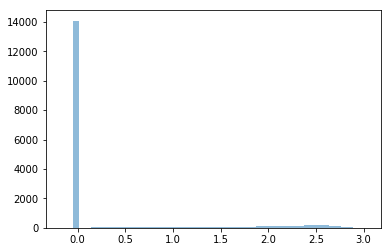

In [236]:
plt.hist(oof, bins=50, alpha=0.5)

In [240]:
oof[oof != 0].shape

(3614,)

In [241]:
np.sort(oof[oof != 0])

array([-0.1746152 , -0.16785587, -0.08666837, ...,  2.97991795,
        2.98843846,  3.01823669])

(array([  2.,   2.,   4.,   6.,  11.,  21.,  38.,  45.,  52.,  42.,  64.,
         59.,  49.,  45.,  50.,  47.,  57.,  61.,  45.,  48.,  67.,  60.,
         59.,  59.,  58.,  49.,  68.,  68.,  72.,  69.,  68.,  75.,  91.,
         95., 100., 120., 143., 142., 154., 155., 162., 157., 173., 158.,
        156., 134.,  79.,  50.,  17.,   8.]),
 array([-0.1746152 , -0.11075816, -0.04690113,  0.01695591,  0.08081295,
         0.14466999,  0.20852703,  0.27238406,  0.3362411 ,  0.40009814,
         0.46395518,  0.52781221,  0.59166925,  0.65552629,  0.71938333,
         0.78324037,  0.8470974 ,  0.91095444,  0.97481148,  1.03866852,
         1.10252555,  1.16638259,  1.23023963,  1.29409667,  1.35795371,
         1.42181074,  1.48566778,  1.54952482,  1.61338186,  1.67723889,
         1.74109593,  1.80495297,  1.86881001,  1.93266705,  1.99652408,
         2.06038112,  2.12423816,  2.1880952 ,  2.25195223,  2.31580927,
         2.37966631,  2.44352335,  2.50738039,  2.57123742,  2.63509446,
 

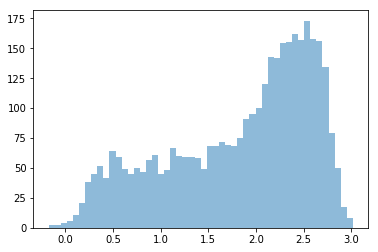

In [242]:
plt.hist(oof[oof != 0], bins=50, alpha=0.5)

In [243]:
label_df[oof != 0]

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.000000,3
7,b2297d292892745a,0006c192,Mushroom Sorter (Assessment),0,4,0.000000,0
8,ae691ec5ad5652cf,00129856,Bird Measurer (Assessment),1,0,1.000000,3
13,dc6bc0284039c9fb,001d0ed0,Mushroom Sorter (Assessment),1,0,1.000000,3
14,619b9c069cf790ca,00225f67,Bird Measurer (Assessment),0,2,0.000000,0
...,...,...,...,...,...,...,...
17670,c19e33a37f4750ba,ff9305d7,Chest Sorter (Assessment),0,3,0.000000,0
17679,fad7b5cfd31171a0,ff9715db,Cauldron Filler (Assessment),1,0,1.000000,3
17685,c996482b11d149dd,ffc90c32,Bird Measurer (Assessment),1,0,1.000000,3
17686,b05a02b52d5c1f4c,ffd2871d,Cauldron Filler (Assessment),1,0,1.000000,3


In [244]:
import sys
sys.path.append('../scripts/')

from yamakawa_san_utils import qwk, OptimizedRounder

In [247]:
optR = OptimizedRounder()
optR.fit(oof[oof != 0], label_df[oof != 0].accuracy_group, [[1.0, 1.5, 2.0]])

In [248]:
coefficients = optR.coefficients()
opt_preds = optR.predict(oof[oof != 0], coefficients)

In [257]:
coefficients

array([1.05309344, 1.59667888, 2.28172962])

In [250]:
opt_preds

[1, 0, 2, 0, 0, ..., 1, 3, 2, 3, 2]
Length: 3614
Categories (4, int64): [0 < 1 < 2 < 3]

In [253]:
label_df['y_pred'] = None
label_df.loc[oof != 0, 'y_pred'] = opt_preds

In [256]:
(label_df.accuracy_group == label_df.y_pred).dropna().mean()

0.08496325607687959

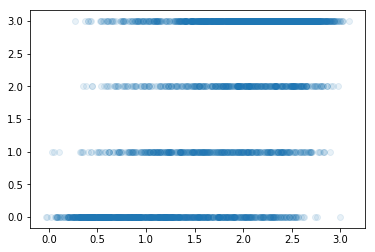

In [270]:
plt.scatter(oof[oof != 0], labels[oof != 0], alpha=0.1)

ValueError: x and y must be the same size

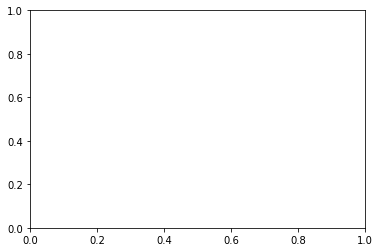

In [266]:
plt.scatter(oof[oof != 0], labels[labels != 0], alpha=0.1)

In [267]:
labels

array([0., 0., 0., ..., 0., 0., 1.])

In [272]:
tst_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [279]:
df = tst_df.query('installation_id == "00abaee7"')

In [280]:
df['gs_max_time'] = df.groupby("game_session")["timestamp"].transform('max')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
pv = pd.pivot_table(df, index=["installation_id", "gs_max_time", "game_session", "type"],
                    columns="event_code",
                    values="timestamp",
                    aggfunc="count")#.fillna(0)

In [282]:
pv

event_code                                                            2000  \
installation_id gs_max_time              game_session     type               
00abaee7        2019-09-10T16:50:24.910Z 0ea9ecc81a565215 Clip         1.0   
                2019-09-10T16:50:55.503Z c1ea43d8b8261d27 Clip         1.0   
                2019-09-10T16:51:51.805Z 7ed86c6b72e725e2 Clip         1.0   
                2019-09-10T16:53:12.825Z 7e516ace50e7fe67 Clip         1.0   
                2019-09-10T16:56:27.894Z a022c3f60ba547e7 Game         1.0   
                2019-09-10T16:56:39.003Z 1c203986674d7d9b Clip         1.0   
                2019-09-10T16:57:00.851Z c58423edbb934d93 Clip         1.0   
                2019-09-10T16:57:24.641Z 3b845db6d1d108b5 Clip         1.0   
                2019-09-11T13:44:15.540Z 2841aa0233220ac0 Game         1.0   
                2019-09-11T13:44:33.549Z 18c82207b2e63482 Clip         1.0   
                2019-09-11T13:46:25.154Z 41591f66b833b47c Activity     1.0   
                2019-09-11T14:44:34.801Z b3529e1187ceaf8f Clip         1.0   
                2019-09-11T14:44:53.535Z 2c3592f7677f33cf Clip         1.0   
                2019-09-11T16:14:14.819Z 237c4e2190a4b5fe Clip         1.0   
                2019-09-11T16:14:26.048Z adc1bb4aabbaf129 Clip         1.0   
                2019-09-11T18:55:26.733Z 95bc2e9a5c91e643 Clip         1.0   
                2019-09-11T18:56:41.937Z 8b38fc0d2fd315dc Assessment   1.0   
                2019-09-11T18:59:10.431Z 81b84937f7021692 Activity     1.0   
                2019-09-12T13:40:37.266Z 704e6c1a66c26810 Clip         1.0   
                2019-09-12T13:42:59.372Z 09a603baebcc2052 Activity     1.0   
                2019-09-12T13:44:31.558Z 74ee9fa728ed47ec Activity     1.0   
                2019-09-12T13:45:12.842Z 6ecafbf9e7451a99 Activity     1.0   
                2019-09-12T13:45:33.821Z ffd20705b83b25bc Activity     1.0   
                2019-09-12T13:47:56.142Z 74ce1888faaea83a Activity     1.0   
                2019-09-12T13:51:47.878Z ee2200d38a57537b Game         1.0   
                2019-09-12T13:52:12.193Z 348d7f09f96af313 Assessment   1.0   

event_code                                                            2010  \
installation_id gs_max_time              game_session     type               
00abaee7        2019-09-10T16:50:24.910Z 0ea9ecc81a565215 Clip         NaN   
                2019-09-10T16:50:55.503Z c1ea43d8b8261d27 Clip         NaN   
                2019-09-10T16:51:51.805Z 7ed86c6b72e725e2 Clip         NaN   
                2019-09-10T16:53:12.825Z 7e516ace50e7fe67 Clip         NaN   
                2019-09-10T16:56:27.894Z a022c3f60ba547e7 Game         NaN   
                2019-09-10T16:56:39.003Z 1c203986674d7d9b Clip         NaN   
                2019-09-10T16:57:00.851Z c58423edbb934d93 Clip         NaN   
                2019-09-10T16:57:24.641Z 3b845db6d1d108b5 Clip         NaN   
                2019-09-11T13:44:15.540Z 2841aa0233220ac0 Game         NaN   
                2019-09-11T13:44:33.549Z 18c82207b2e63482 Clip         NaN   
                2019-09-11T13:46:25.154Z 41591f66b833b47c Activity     NaN   
                2019-09-11T14:44:34.801Z b3529e1187ceaf8f Clip         NaN   
                2019-09-11T14:44:53.535Z 2c3592f7677f33cf Clip         NaN   
                2019-09-11T16:14:14.819Z 237c4e2190a4b5fe Clip         NaN   
                2019-09-11T16:14:26.048Z adc1bb4aabbaf129 Clip         NaN   
                2019-09-11T18:55:26.733Z 95bc2e9a5c91e643 Clip         NaN   
                2019-09-11T18:56:41.937Z 8b38fc0d2fd315dc Assessment   1.0   
                2019-09-11T18:59:10.431Z 81b84937f7021692 Activity     NaN   
                2019-09-12T13:40:37.266Z 704e6c1a66c26810 Clip         NaN   
                2019-09-12T13:42:59.372Z 09a603baebcc2052 Activity     NaN   
                2019-09-12T13:44:31.558Z 74ee9fa728ed47ec Activity     NaN   
                2019-

In [283]:
pv = pv.fillna(0)

In [284]:
pv.sort_values("gs_max_time", ascending=True, inplace=True)

In [285]:
pv.reset_index(inplace=True)

In [286]:
pv

event_code,installation_id,gs_max_time,game_session,type,2000,2010,2020,2025,2030,2060,...,3120,3121,4010,4020,4021,4025,4030,4035,4070,4100
0,00abaee7,2019-09-10T16:50:24.910Z,0ea9ecc81a565215,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00abaee7,2019-09-10T16:50:55.503Z,c1ea43d8b8261d27,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,00abaee7,2019-09-10T16:51:51.805Z,7ed86c6b72e725e2,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00abaee7,2019-09-10T16:53:12.825Z,7e516ace50e7fe67,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00abaee7,2019-09-10T16:56:27.894Z,a022c3f60ba547e7,Game,1.0,0.0,1.0,0.0,0.0,0.0,...,28.0,0.0,1.0,17.0,0.0,0.0,38.0,21.0,20.0,0.0
5,00abaee7,2019-09-10T16:56:39.003Z,1c203986674d7d9b,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,00abaee7,2019-09-10T16:57:00.851Z,c58423edbb934d93,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,00abaee7,2019-09-10T16:57:24.641Z,3b845db6d1d108b5,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,00abaee7,2019-09-11T13:44:15.540Z,2841aa0233220ac0,Game,1.0,0.0,3.0,1.0,2.0,0.0,...,1.0,2.0,1.0,13.0,0.0,0.0,17.0,4.0,15.0,0.0
9,00abaee7,2019-09-11T13:44:33.549Z,18c82207b2e63482,Clip,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [287]:
cum_cols = [
    c for c in list(
        pv.columns) if c not in [
        "installation_id",
        "type",
        "game_session",
        "gs_max_time"]]

In [289]:
pv[cum_cols] = pv[cum_cols].cumsum().shift(1).fillna(0).astype("int32")
pv

event_code,installation_id,gs_max_time,game_session,type,2000,2010,2020,2025,2030,2060,...,3120,3121,4010,4020,4021,4025,4030,4035,4070,4100
0,00abaee7,2019-09-10T16:50:24.910Z,0ea9ecc81a565215,Clip,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00abaee7,2019-09-10T16:50:55.503Z,c1ea43d8b8261d27,Clip,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00abaee7,2019-09-10T16:51:51.805Z,7ed86c6b72e725e2,Clip,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00abaee7,2019-09-10T16:53:12.825Z,7e516ace50e7fe67,Clip,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00abaee7,2019-09-10T16:56:27.894Z,a022c3f60ba547e7,Game,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,00abaee7,2019-09-10T16:56:39.003Z,1c203986674d7d9b,Clip,5,0,1,0,0,0,...,28,0,1,17,0,0,38,21,20,0
6,00abaee7,2019-09-10T16:57:00.851Z,c58423edbb934d93,Clip,6,0,1,0,0,0,...,28,0,1,17,0,0,38,21,20,0
7,00abaee7,2019-09-10T16:57:24.641Z,3b845db6d1d108b5,Clip,7,0,1,0,0,0,...,28,0,1,17,0,0,38,21,20,0
8,00abaee7,2019-09-11T13:44:15.540Z,2841aa0233220ac0,Game,8,0,1,0,0,0,...,28,0,1,17,0,0,38,21,20,0
9,00abaee7,2019-09-11T13:44:33.549Z,18c82207b2e63482,Clip,9,0,4,1,2,0,...,29,2,2,30,0,0,55,25,35,0


In [291]:
pv = pv.loc[pv["type"] == "Assessment"]  # assessment だけとればOK
pv

event_code,installation_id,gs_max_time,game_session,type,2000,2010,2020,2025,2030,2060,...,3120,3121,4010,4020,4021,4025,4030,4035,4070,4100
16,00abaee7,2019-09-11T18:56:41.937Z,8b38fc0d2fd315dc,Assessment,16,0,4,1,2,0,...,29,2,2,38,0,0,63,25,37,0
25,00abaee7,2019-09-12T13:52:12.193Z,348d7f09f96af313,Assessment,25,1,11,1,7,1,...,33,9,3,120,12,10,148,33,190,1


In [293]:
rename_dict = {}
for c in cum_cols:
    rename_dict[c] = "ev_cnt" + str(c)
pv.rename(columns=rename_dict, inplace=True)
pv.reset_index(inplace=True, drop=True)

del pv["gs_max_time"], pv["type"]

pv2 = pd.DataFrame([pv.iloc[-1, :]])

In [294]:
pv2

event_code,installation_id,game_session,ev_cnt2000,ev_cnt2010,ev_cnt2020,ev_cnt2025,ev_cnt2030,ev_cnt2060,ev_cnt2070,ev_cnt3010,...,ev_cnt3120,ev_cnt3121,ev_cnt4010,ev_cnt4020,ev_cnt4021,ev_cnt4025,ev_cnt4030,ev_cnt4035,ev_cnt4070,ev_cnt4100
1,00abaee7,348d7f09f96af313,25,1,11,1,7,1,1,111,...,33,9,3,120,12,10,148,33,190,1


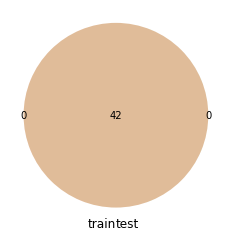

In [295]:
matplotlib_venn.venn2([set(trn_df.event_code), set(tst_df.event_code)], set_labels=['train', 'test'])

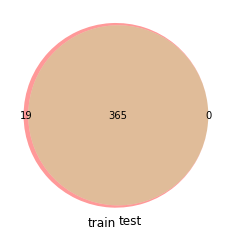

In [296]:
matplotlib_venn.venn2([set(trn_df.event_id), set(tst_df.event_id)], set_labels=['train', 'test'])

In [301]:
diff_event_id = set(trn_df.event_id) - set(tst_df.event_id)

In [304]:
specs_df.query(f'event_id in ({tuple(diff_event_id)})')

,event_id,info,args
10,119b5b02,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
20,ecc6157f,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
34,7fd1ac25,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
37,a8cc6fec,The exit game event is triggered when the game...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
43,5dc079d8,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
111,1b54d27f,The exit game event is triggered when the game...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
170,29a42aea,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
188,bfc77bd6,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
196,13f56524,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
223,01ca3a3c,This event occurs when the player hovers the m...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [320]:
imp_df = pd.read_csv('../mnt/importances/e026.csv')

In [327]:
diff_event_id

{'003cd2ee',
 '01ca3a3c',
 '0ce40006',
 '119b5b02',
 '13f56524',
 '17ca3959',
 '1b54d27f',
 '29a42aea',
 '2ec694de',
 '4074bac2',
 '5dc079d8',
 '611485c5',
 '7fd1ac25',
 'a8cc6fec',
 'ab4ec3a4',
 'bfc77bd6',
 'dcb1663e',
 'e4d32835',
 'ecc6157f'}

In [349]:
trn_df.query(f'event_id in {tuple(diff_event_id)}').type.value_counts()

Assessment    105
Activity       73
Game           63
Name: type, dtype: int64

In [351]:
set(trn_df.query(f'event_id in {tuple(diff_event_id)}').installation_id) - set(label_df.installation_id)

{'18a920b3',
 '2cb49bda',
 '33faef73',
 '3b6e99ea',
 '3f079fd6',
 '433726dc',
 '54511e29',
 '83c773df',
 '90c8e087',
 '938f52e0',
 '98e0e15f',
 'bcf20212',
 'c9ba7364',
 'e0bc76ac',
 'f0cf5713'}

In [321]:
imp_df.feature.tolist()

['12 Monkeys',
 'Air Show',
 'All Star Sorting',
 'Balancing Act',
 'Bird Measurer (Assessment)',
 'Bottle Filler (Activity)',
 'Bubble Bath',
 'Bug Measurer (Activity)',
 'Cart Balancer (Assessment)',
 'Cauldron Filler (Assessment)',
 'Chest Sorter (Assessment)',
 'Chicken Balancer (Activity)',
 'Chow Time',
 'Costume Box',
 'Crystal Caves - Level 1',
 'Crystal Caves - Level 2',
 'Crystal Caves - Level 3',
 'Crystals Rule',
 'Dino Dive',
 'Dino Drink',
 'Egg Dropper (Activity)',
 'Fireworks (Activity)',
 'Flower Waterer (Activity)',
 'Happy Camel',
 'Heavy_ Heavier_ Heaviest',
 'Honey Cake',
 'Leaf Leader',
 'Lifting Heavy Things',
 'Magma Peak - Level 1',
 'Magma Peak - Level 2',
 'Mushroom Sorter (Assessment)',
 'Ordering Spheres',
 'Pan Balance',
 "Pirate's Tale",
 'Rulers',
 'Sandcastle Builder (Activity)',
 'Scrub-A-Dub',
 'Slop Problem',
 'Treasure Map',
 'Tree Top City - Level 1',
 'Tree Top City - Level 2',
 'Tree Top City - Level 3',
 'Watering Hole (Activity)',
 'Welcome to 

In [330]:
imp_df[imp_df.feature.str.contains('e4d32835')]

,feature,importance,fold


In [350]:
ev_df = pd.read_pickle('../mnt/inputs/features/train/EventCount2.pkl')
ev_df2 = pd.read_pickle('../mnt/inputs/features/train/EventCount2.pkl')
ev_df.shape, ev_df2.shape

((21239, 383), (21239, 383))

In [335]:
kb_df = pd.read_pickle('../mnt/inputs/features/test/KernelBasics3.pkl')
enc_df = pd.read_pickle('../mnt/inputs/features/test/EncodingTitles.pkl')

In [334]:
enc_df.head()

,installation_id,game_session,title_enc
1,00abaee7,348d7f09f96af313,9
5,01242218,1fef5d54cb4b775a,8
0,017c5718,4b165a330a0bdd6c,30
0,01a44906,be0b655ad1fee30c,30
0,01bc6cb6,46e8bbed71df7520,8


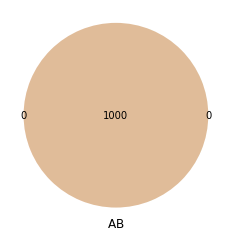

In [337]:
matplotlib_venn.venn2([set(enc_df.game_session), set(kb_df.game_session)])

In [343]:
enc_df.title_enc.value_counts() / 1000

8     0.257
30    0.244
9     0.229
10    0.137
4     0.133
Name: title_enc, dtype: float64

In [347]:
pd.read_pickle('../mnt/inputs/features/train/EncodingTitles.pkl').title_enc.value_counts() / len(pd.read_pickle('../mnt/inputs/features/train/EncodingTitles.pkl').title_enc)

8     0.227789
30    0.224587
9     0.224446
10    0.176609
4     0.146570
Name: title_enc, dtype: float64

In [354]:
(sub_df.installation_id.values == kb_df.installation_id.values).copy()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,